**Алексеев Константин, Вариант 1, БД-231м**
 1. Парсинг данных о дневных курсах валют с сайта Центрального банка РФ
 https://www.cbr.ru/currency_base/daily

**Практическая работа 2**

# Парсинг HTML. BeautifulSoup

**Цель работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки информации.

In [21]:
#Импортирование библиотек:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\User\anaconda3\envs\universal_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


3. Получение HTML-кода страницы

In [3]:
url = 'https://www.cbr.ru/currency_base/daily/'
response = requests.get(url)
page_content = response.content

4. Парсинг HTML с помощью BeautifulSoup

In [4]:
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'class': 'data'})
rows = table.find_all('tr')

5. Извлечение данных и создание DataFrame

In [5]:
data = []
for row in rows[1:]:  # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

df = pd.DataFrame(data, columns=['Num', 'CharCode', 'Unit', 'Currency', 'Value'])
df['Value'] = df['Value'].str.replace(',', '.').astype(float)

6. Обработка данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Num       43 non-null     object 
 1   CharCode  43 non-null     object 
 2   Unit      43 non-null     object 
 3   Currency  43 non-null     object 
 4   Value     43 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.8+ KB


С данными всё ок

7. Анализ данных

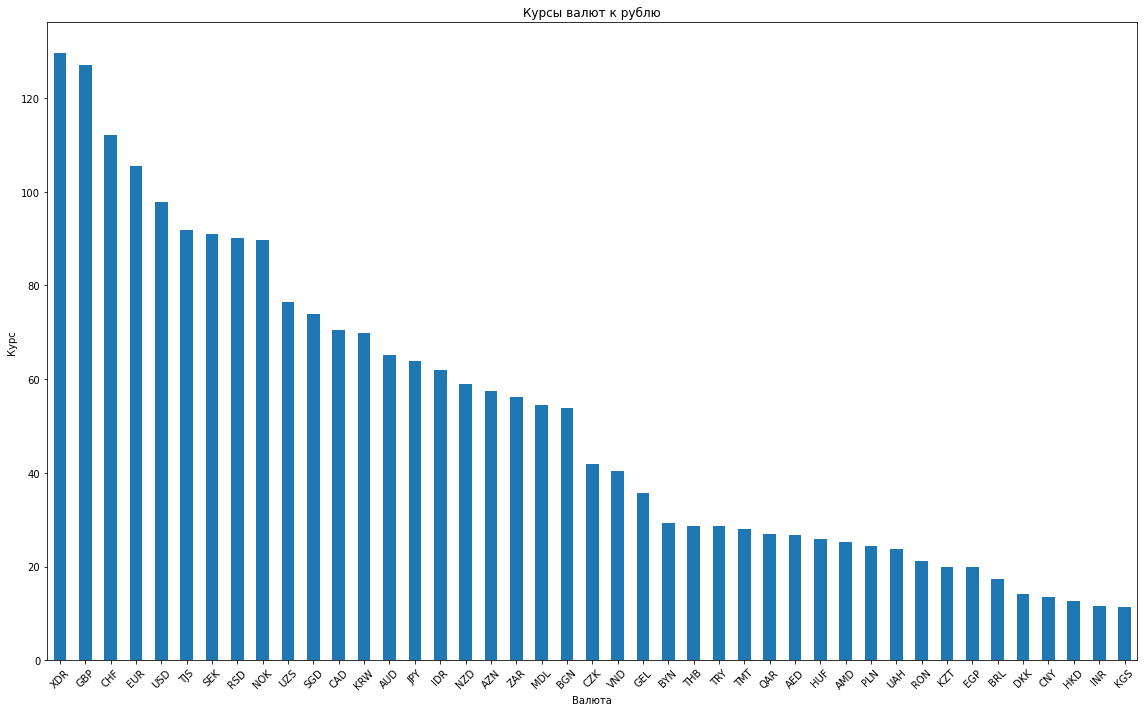

In [20]:
df.sort_values(by='Value', ascending=False).plot(kind='bar', x='CharCode', y='Value', legend=False, figsize=(16, 10))
plt.title('Курсы валют к рублю')
plt.xlabel('Валюта')
plt.ylabel('Курс')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
highest_rate = df.loc[df['Value'].idxmax()]
lowest_rate = df.loc[df['Value'].idxmin()]

print(f"Самый высокий курс: {highest_rate['Currency']} - {highest_rate['Value']}")
print(f"Самый низкий курс: {lowest_rate['Currency']} - {lowest_rate['Value']}")

Самый высокий курс: СДР (специальные права заимствования) - 129.6529
Самый низкий курс: Киргизских сомов - 11.3496


In [25]:
df.describe()

,Value
count,43.000000
mean,51.741098
std,33.590992
min,11.349600
25%,24.821400
50%,41.798500
75%,72.271900
max,129.652900


**Вывод:**

Самый высокий курс: СДР (специальные права заимствования) - 129.6529
Самый низкий курс: Киргизских сомов - 11.3496\

Медианный курс - 41.8, а средний курс 51.7, что говорит о том, что из-за высоких курсов по отношению к некоторым валютам, средний курс увеличивается.
